In [22]:
import pandas as pd

In [23]:
# pip install pandas

In [24]:
df=pd.read_csv(r"C:\Users\ruhi1\Downloads\california_housing_train.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [44]:
# pip install seaborn

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

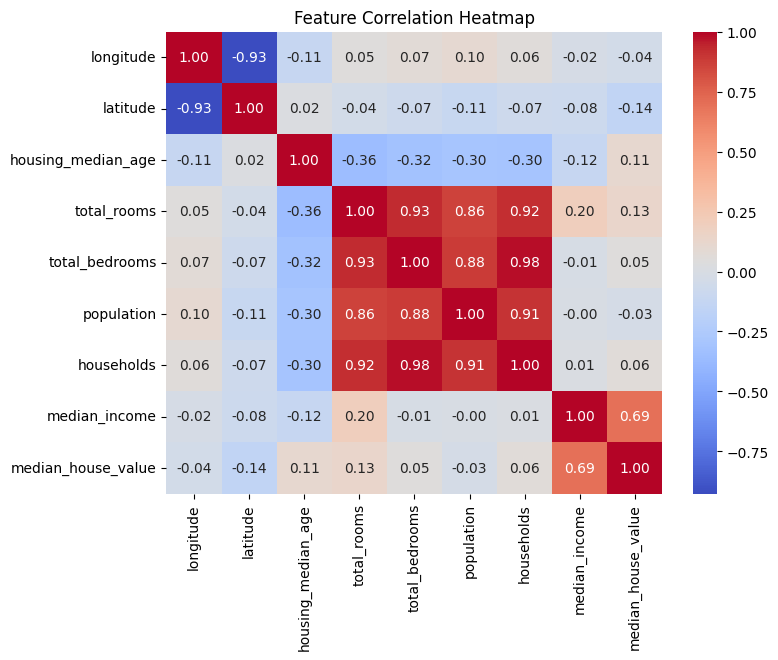

In [46]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [47]:
# df.info()
# df.shape


In [48]:
# df.drop(columns=['longitude', 'latitude','total_bedrooms', 'population','households'],axis=1, inplace=True)
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1          1129.0       463.0         1.8200             80100.0  
2           333.0       117.0         1.6509             85700.0  
3           515.0       226.0         3.1917             73400.0  
4           624.0       262.0         1.9250             65500.0  
...           ...         ...            ...                 ...  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0  

[17000 rows x 9 columns]

In [49]:
df_copy=df.copy()
for col in df.columns:
    if col=='median_house_value':
        continue

    mean_df=df[col].mean()
    std_df=df[col].std()
    lower_bound= mean_df-3*std_df
    upper_bound=mean_df+3*std_df
    filtered_df=df[(df[col]>lower_bound)&(df[col]<upper_bound)]
    # filtered_df.info()

In [50]:
filtered_df.shape

(16714, 9)

In [51]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [52]:
x=df.drop(columns=['median_house_value'],axis=1)
x.shape

(17000, 8)

In [53]:
y=df['median_house_value']


In [54]:
# pip install scikit-learn

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.2)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x_train)




In [57]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(scaled_x,y_train)

LinearRegression()

In [58]:
scaled_x_test=scaler.transform(x_test)
predicted_median_price=model.predict(scaled_x_test)
# print(predicted_median_price)

In [59]:
from sklearn.metrics import mean_squared_error,r2_score
mse_score=mean_squared_error(y_test,predicted_median_price)
print(f'The mse_score is: {mse_score: .2f}')

model_r2_score=r2_score(y_test,predicted_median_price)
print(f'The model_r2_score is: {model_r2_score: .2f}')

The mse_score is:  4840403343.05
The model_r2_score is:  0.63


In [62]:
from sklearn.ensemble import RandomForestRegressor
rfr_model=RandomForestRegressor()
rfr_model.fit(scaled_x,y_train)

RandomForestRegressor()

In [64]:
predict_rfr_median_price=rfr_model.predict(scaled_x_test)
print(predict_rfr_median_price)

[132551.   180242.   254728.   ... 127232.01 291402.   315979.  ]


In [65]:
from sklearn.metrics import mean_squared_error,r2_score
mse_score=mean_squared_error(y_test,predict_rfr_median_price)
print(f'The mse_score is: {mse_score: .2f}')

model_r2_score=r2_score(y_test,predict_rfr_median_price)
print(f'The model_r2_score is: {model_r2_score: .2f}')

The mse_score is:  2343413006.86
The model_r2_score is:  0.82


In [69]:
rfr_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Split your data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Define the parameter grid (example ranges — you can adjust!)
param_grid = {
    'n_estimators': [120],  # Fix this for now
    'max_depth': [None, 20],  # Reduced from 4 → 2
    'max_features': ['sqrt', 0.8],  # Reduced from 4 → 2
    'min_samples_split': [2, 5],  # Reduced from 3 → 2
    'min_samples_leaf': [1, 2],   # Reduced from 3 → 2
    'max_leaf_nodes': [None],     # Fixed (you can also test [None, 40])
    'max_samples': [None, 0.8]    # Reduced from 3 → 2
}


# Step 3: Create the base model
rf = RandomForestRegressor(random_state=42)

# Step 4: Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,  # Use all CPU cores
    verbose=2,
    scoring='r2'
)

# Step 5: Fit to the training data
grid_search.fit(x_train, y_train)

# Step 6: Best parameters and evaluation
print("✅ Best Hyperparameters:", grid_search.best_params_)

# Step 7: Predict with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Step 8: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\n📈 R² Score: {r2:.4f}")
print(f"📉 MSE: {mse:.2f}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
✅ Best Hyperparameters: {'max_depth': 20, 'max_features': 0.8, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 120}

📈 R² Score: 0.8251
📉 MSE: 2410118461.56


In [74]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 2. Scale data (very important for SVR)
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# 3. Create and train model
model = SVR(kernel='rbf')  # You can also use 'linear', 'poly'
model.fit(x_train_scaled, y_train_scaled)

# 4. Predict and evaluate
y_pred_scaled = model.predict(x_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.7644


In [75]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split your dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Scale features (important for Ridge)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step 3: Create and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # alpha = regularization strength
ridge_model.fit(x_train_scaled, y_train)

# Step 4: Predict on test data
y_pred = ridge_model.predict(x_test_scaled)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 MSE: {mse:.2f}")
print(f"📈 R² Score: {r2:.4f}")


📉 MSE: 4634762362.71
📈 R² Score: 0.6636


In [76]:
from sklearn.linear_model import Lasso

# Create and train Lasso model
lasso_model = Lasso(alpha=1.0)  # Try alpha=0.1 or use GridSearchCV to tune
lasso_model.fit(x_train_scaled, y_train)

# Predict and evaluate
y_pred_lasso = lasso_model.predict(x_test_scaled)

print(f"Lasso Regression R² Score: {r2_score(y_test, y_pred_lasso):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso):.2f}")


Lasso Regression R² Score: 0.6636
MSE: 4634692284.93


In [77]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step 3: Initialize and train ElasticNet
model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # l1_ratio=0.5 balances L1 and L2
model.fit(x_train_scaled, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(x_test_scaled)

print(f"ElasticNet R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")


ElasticNet R² Score: 0.5056
MSE: 6812513782.99


In [78]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Transform features to polynomial (e.g., degree 2 or 3)
poly = PolynomialFeatures(degree=2, include_bias=False)  # degree=2 for quadratic
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Step 3: Scale the polynomial features (important for performance)
scaler = StandardScaler()
x_train_poly_scaled = scaler.fit_transform(x_train_poly)
x_test_poly_scaled = scaler.transform(x_test_poly)

# Step 4: Fit a Linear Regression model to the transformed features
model = LinearRegression()
model.fit(x_train_poly_scaled, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(x_test_poly_scaled)

print(f"Polynomial Regression R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")


Polynomial Regression R² Score: 0.7216
MSE: 3835875055.14


In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# (Optional) Step 2: Scaling — not necessary for decision trees
# But can be useful if comparing with other models
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# Step 3: Train the Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=None, random_state=42)
model.fit(x_train, y_train)

# Step 4: Predict
y_pred = model.predict(x_test)

# Step 5: Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")


R² Score: 0.6485
MSE: 4843750289.11


In [80]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Optional scaling (not always necessary for tree-based models)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step 3: Initialize and train the model
gbr = GradientBoostingRegressor(
    n_estimators=100,     # Number of boosting stages
    learning_rate=0.1,    # Step size shrinkage
    max_depth=3,          # Max depth of each tree
    random_state=42
)
gbr.fit(x_train_scaled, y_train)

# Step 4: Predict and evaluate
y_pred = gbr.predict(x_test_scaled)

print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")


R² Score: 0.7852
MSE: 2960108244.59


In [81]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Scale features (important for distance-based models)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step 3: Initialize and train the model
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors
knn.fit(x_train_scaled, y_train)

# Step 4: Predict and evaluate
y_pred = knn.predict(x_test_scaled)

print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")


R² Score: 0.7149
MSE: 3928749637.54


In [83]:
import joblib
rfrmodel=joblib.dump(rfr_model,'Trained_model.pkl')
scaler_model=joblib.dump(scaler,'scaler_model.pkl')